In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from scipy.stats import norm

from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

from textblob import TextBlob
import re
import string
import plotly.graph_objects as go


In [4]:
# Read COVID-19 data from CSV file

df = pd.read_csv("covid19_tweets.csv")

In [5]:
# Print first 5 lines of data

df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
# Provide basic statistical summary of data

df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [12]:
print(df.columns)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


In [13]:
# Print data shape

print("Rows: {}, Columns: {}".format(df.shape[0], df.shape[1]))

Rows: 179108, Columns: 13


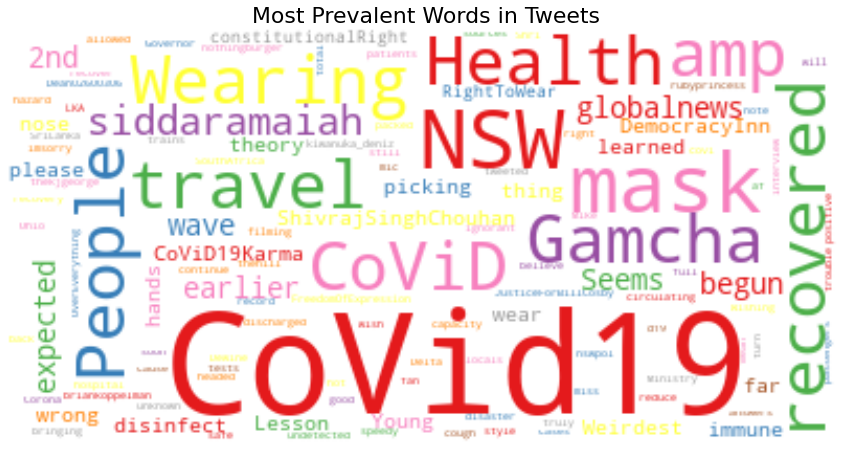

In [14]:
# Generate wordcloud visualization of data

text = ",".join(summary for summary in df.text if 'COVID' not in summary and 'covid19' not in summary and 'https' not in summary and 'Covid' not in summary)
wordcloud = WordCloud(max_words=120, colormap='Set1',background_color="white", stopwords=stop_words,collocations=False).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")

stop_words=set(STOPWORDS)
source_string = " ".join(df['source'].astype('str'))
hastage_string = " ".join(df['hashtags'].astype('str'))
location_string = " ".join(df['user_location'].astype('str'))

plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title("Most Prevalent Words in Tweets",fontsize=22)
plt.show()

In [15]:
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [16]:
# Read sentiment data from CSV file

data = pd.read_csv('finalSentimentdata2.csv')

In [17]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [18]:
# Provide basic information of sentiment data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [21]:
# Display number of distinct observations occuring within data's "sentiment" axis

data['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



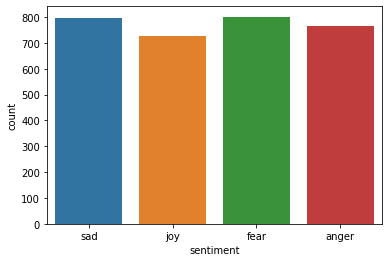

In [22]:
# Plot sentiment by value

sns.countplot(data['sentiment'])

In [23]:
# Function that cleans text of data

def clean_text(text):
    
    # Make text lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    # Remove punctuation
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

In [24]:
# Clean text of sentiment data

data['text'] = data['text'].apply(lambda x: clean_text(x))

In [25]:
# Function that removes emoji from sentiment data

def remove_emoji(text):
    
    # Remove emoticons, symbols & pictographs, transport & map symbols, iOS flags
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

In [26]:
# Remove emoji from sentiment data

data['text']=data['text'].apply(lambda x: remove_emoji(x))

In [29]:
# ================================
# Prepare data for ML analysis
# ================================


from sklearn.model_selection import train_test_split

tData, valid = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data.sentiment.values)
print("tData shape : ", tData.shape)
print("valid shape : ", valid.shape)

tData shape :  (2472, 3)
valid shape :  (618, 3)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace', stop_words = stop)

x_train = vectorizer.fit_transform(tData.text.values)
x_valid = vectorizer.transform(valid.text.values)

y_train = tData.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", x_train.shape)
print("X_train.shape : ", x_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
X_train.shape :  (2472, 8551)
X_train.shape :  (618, 8551)
y_train.shape :  (2472,)
y_valid.shape :  (618,)


In [34]:
# Example of grid searching key hyperparameters for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

# Define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")

Best: 0.668 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(x_train,y_train)

NB_prediction = naiveByes_clf.predict(x_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(x_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print("\n")
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9526699029126213
Validation accuracy Score :  0.6779935275080906


              precision    recall  f1-score   support

       anger       0.54      0.67      0.60       124
        fear       0.66      0.57      0.61       183
         joy       0.71      0.82      0.76       126
         sad       0.81      0.69      0.74       185

    accuracy                           0.68       618
   macro avg       0.68      0.69      0.68       618
weighted avg       0.69      0.68      0.68       618



In [36]:
# Location Analysis
df['user_location'].fillna('unknown', inplace=True)
df['user_location'].value_counts()

unknown                        36771
India                           3741
United States                   2455
New Delhi, India                1721
Mumbai, India                   1401
                               ...  
Newport, TN                        1
NW of LA                           1
Lexington, KY USA 🇺🇸               1
Near Amsterdam, Netherlands        1
Haslemere | Bordon | Alton         1
Name: user_location, Length: 26921, dtype: int64

In [38]:
# functions
def plot_bar(x, y, title, x_label, y_label):
    fig = go.Figure(data=[go.Bar(
        x=x,
        y=y,
        text=y,
        textposition='auto'    
    )])

    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label
    )

    fig.show()
def correct_location(x):
    # correct the location using either the alpha 2 or alpha 3 code
    # alpha 2 = 2 character shorthand i.e. US
    # alpha 3 = 3 character shorthand i.e. USA
    c = list(pycountry.countries)
    for i in c:
        if str(i.name).lower() in x or str(i.alpha_2).lower() in x.split() or str(i.alpha_3).lower() in x.split():
            return str(i.name)
    return x

In [39]:
import pycountry
df['user_location'] = df['user_location'].apply(lambda x: correct_location(x.lower()))

# this wont entirely clean it up. There are still a lot of unknowns and state/city only data

ModuleNotFoundError: ignored

In [40]:
print(df['user_location'].value_counts())
plot_bar(df['user_location'].value_counts().index[0:20],
         df['user_location'].value_counts().values[0:20],
         "Top 20 Locations by the number of tweets",
         "Location",
         "Tweet Count")

unknown                        36771
India                           3741
United States                   2455
New Delhi, India                1721
Mumbai, India                   1401
                               ...  
Newport, TN                        1
NW of LA                           1
Lexington, KY USA 🇺🇸               1
Near Amsterdam, Netherlands        1
Haslemere | Bordon | Alton         1
Name: user_location, Length: 26921, dtype: int64


In [42]:
plot_bar(df['user_name'].value_counts().index[0:20],
         df['user_name'].value_counts().values[0:20],
         "Top 20 Usernames by the number of tweets",
         "Username",
         "Tweet Count")

In [48]:
plot_bar(df['source'].value_counts().index[0:20],df['user_name'].value_counts().values[0:20],'Frequency of Source Tweeting About Corona','Source','Tweet Count')

In [51]:
# Function to remove punctuation

from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [56]:
# Code to get most commonly used words

from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_10_words = pd.DataFrame(loc_tweet_count.most_common(10), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_10_words, ax=ax)
    plt.title("Top 10 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



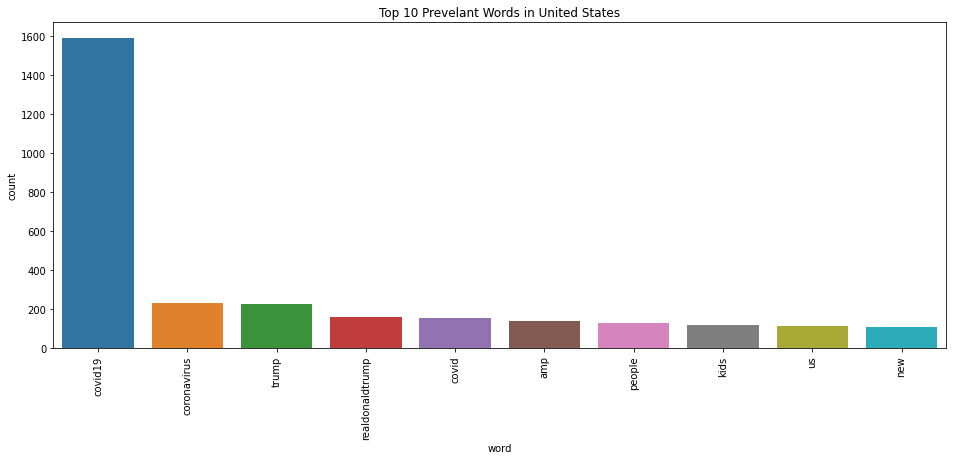

In [57]:
draw_bar_graph_for_text_visualization(df, 'United States')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



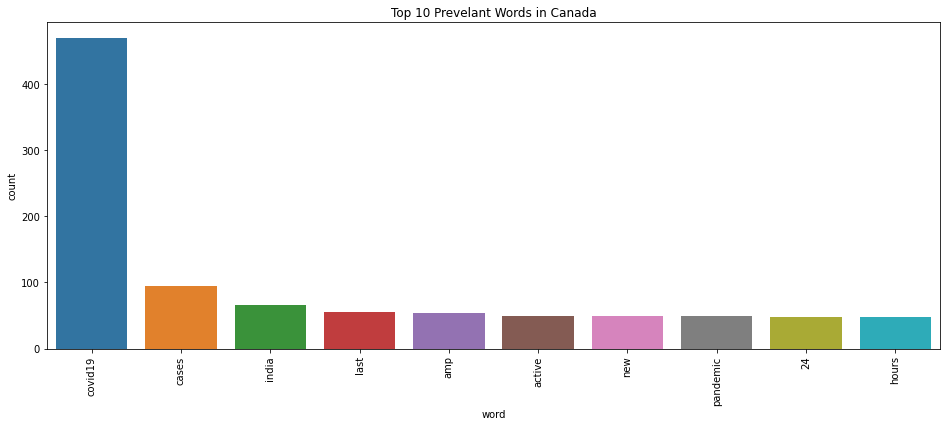

In [59]:
draw_bar_graph_for_text_visualization(df, 'Canada')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



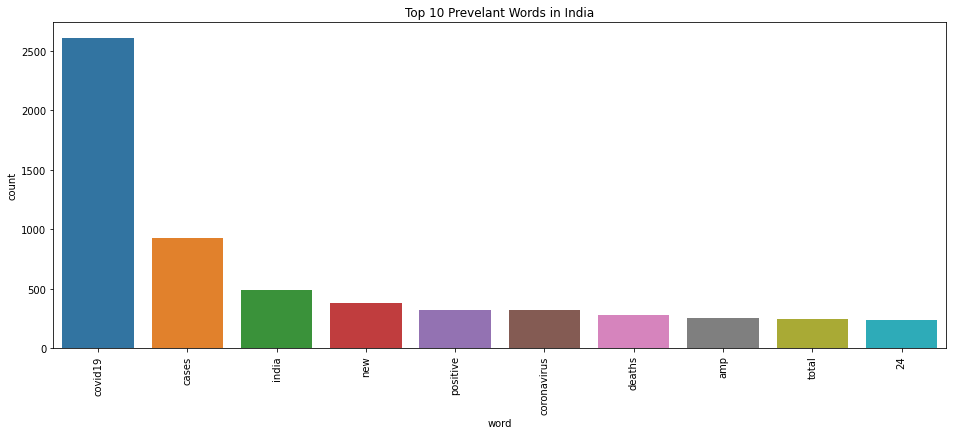

In [60]:
draw_bar_graph_for_text_visualization(df, 'India')

In [43]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [44]:
followers = df.sort_values('user_followers',ascending=False).drop_duplicates(subset='user_name', keep="first")


In [45]:
from millify import millify
plt.figure(figsize=(15, 15))
sns.barplot(y='user_name',x='user_followers',data=followers.head(20))

data1 = followers.head(20).reset_index().copy()
for i in range(20):
    data1['user_followers'][i] = millify(data1['user_followers'][i],precision=2)
data1['user_followers'] = data1['user_followers'].str[:-1].astype(float) # To remove 'M'
y=data1['user_followers'].head(20)

for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)

plt.title('Top 20 users by followers',weight='bold', size=15)

plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('Followers (in millions)', size=12, weight='bold')
plt.show()

ModuleNotFoundError: ignored